<h1>Climate Risk and Economic Losses<h1>

This dataset contains critical information about the Global Climate Risk Index and associated economic data for countries around the world. The data provides insight into the effects of climate-related disasters on countries, allowing us to understand which areas are most affected. This dataset includes columns such as geom, cri_rank, cri_score, fatalities_per_100k_rank, fatalities per 100k total, fatalities rank, and more.

# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [2]:
df = pd.read_csv("climate-risk-index-1.csv")
df.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


<h4>Below the description of the columns<h4>

<b>the_geom:</b> Geometry of the country  
<b>the_geom_webmercator:</b> Web Mercator projection of the geometry of the country  
<b>cri_rank:</b> Rank of the country on the Climate Risk Index  
<b>cri_score:</b> Score of the country on the Climate Risk Index  
<b>fatalities_per_100k_rank:</b> Rank of the country in terms of fatalities per 100,000 people    
<b>fatalities_per_100k_total:</b> Total number fatalities per 100,000 people  
<b>fatalities_rank:</b> Rank of the country in terms of total fatalities  
<b>fatalities_total:</b> Total number of fatalities   
<b>losses_per_gdp__rank:</b> Rank of the country in terms of losses per GDP  
<b>losses_per_gdp__total:</b> Total losses per GDP  
<b>losses_usdm_ppp_rank:</b> Rank of the country in terms of losses in USDM PPP    
<b>losses_usdm_ppp_total:</b> Total losses in USDM PPP  
<b>rw_country_code:</b> Country code  
<b>rw_country_name:</b> Country name  

In [3]:
#checking data types and total entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

<h1>Data Wrangling<h1>

<AxesSubplot:>

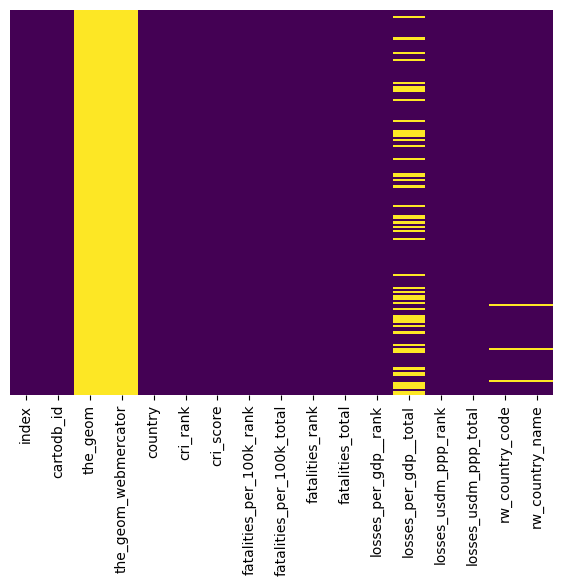

In [4]:
#visualizing missing data
plt.figure(figsize = (7,5))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [5]:
#Dropping columns with excessive missing data
df.drop(['the_geom', 'the_geom_webmercator'], axis = 1, inplace = True)
df.head()

,index,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [6]:
#checking for duplicate values
df_dup = df.duplicated().sum()
print(f"there are {df_dup} duplicate values")

there are 0 duplicate values


In [7]:
#check columns
df.columns

Index(['index', 'cartodb_id', 'country', 'cri_rank', 'cri_score',
       'fatalities_per_100k_rank', 'fatalities_per_100k_total',
       'fatalities_rank', 'fatalities_total', 'losses_per_gdp__rank',
       'losses_per_gdp__total', 'losses_usdm_ppp_rank',
       'losses_usdm_ppp_total', 'rw_country_code', 'rw_country_name'],
      dtype='object')

In [8]:
#droping index column
df.drop('index', axis =1, inplace = True)
df.head(2)

,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,1,Saudi Arabia,79,72.5,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,2,Romania,61,61.5,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania


In [9]:
missing_data =df.isnull()
missing_data.head()

,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#finding the total number of missing values per column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

cartodb_id
False    182
Name: cartodb_id, dtype: int64

country
False    182
Name: country, dtype: int64

cri_rank
False    182
Name: cri_rank, dtype: int64

cri_score
False    182
Name: cri_score, dtype: int64

fatalities_per_100k_rank
False    182
Name: fatalities_per_100k_rank, dtype: int64

fatalities_per_100k_total
False    182
Name: fatalities_per_100k_total, dtype: int64

fatalities_rank
False    182
Name: fatalities_rank, dtype: int64

fatalities_total
False    182
Name: fatalities_total, dtype: int64

losses_per_gdp__rank
False    182
Name: losses_per_gdp__rank, dtype: int64

losses_per_gdp__total
False    131
True      51
Name: losses_per_gdp__total, dtype: int64

losses_usdm_ppp_rank
False    182
Name: losses_usdm_ppp_rank, dtype: int64

losses_usdm_ppp_total
False    182
Name: losses_usdm_ppp_total, dtype: int64

rw_country_code
False    179
True       3
Name: rw_country_code, dtype: int64

rw_country_name
False    179
True       3
Name: rw_country_name, dtype: int64



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='losses_per_gdp__total', ylabel='Density'>

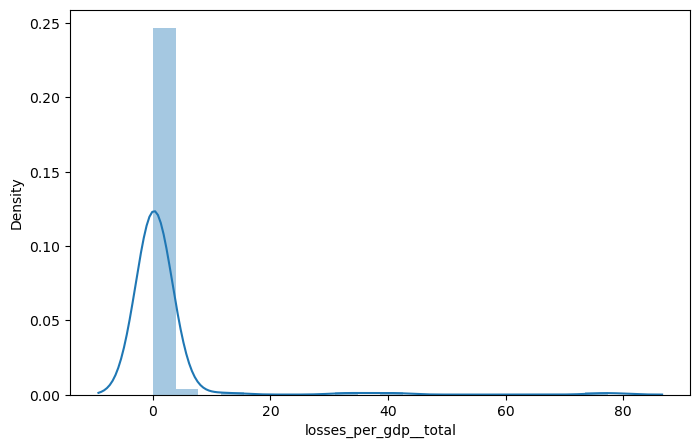

In [11]:
#checking the distribution and its skewness
plt.figure(figsize = (8,5))
sns.distplot(df['losses_per_gdp__total'], kde = True, bins = 20)

In [12]:
mean = df['losses_per_gdp__total'].mean()
print(mean)
df['losses_per_gdp__total'].replace(np.nan,mean, inplace = True)
df.head()

1.5176541984732828


,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,1,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.000100,119,1.229,SAU,Saudi Arabia
1,2,Romania,61,61.50,112,0.01,102,1,16,0.674600,11,2797.884,ROU,Romania
2,3,Spain,69,66.33,74,0.05,47,22,86,0.039400,31,637.070,ESP,Spain
3,4,Slovenia,135,124.50,114,0.00,114,0,135,1.517654,135,0.000,SVN,Slovenia
4,5,South Sudan,133,117.33,114,0.00,114,0,120,0.002100,122,0.508,SSD,South Sudan


In [13]:
df.isnull().sum()

cartodb_id                   0
country                      0
cri_rank                     0
cri_score                    0
fatalities_per_100k_rank     0
fatalities_per_100k_total    0
fatalities_rank              0
fatalities_total             0
losses_per_gdp__rank         0
losses_per_gdp__total        0
losses_usdm_ppp_rank         0
losses_usdm_ppp_total        0
rw_country_code              3
rw_country_name              3
dtype: int64

In [14]:
#drop missing entries
df.dropna(axis =0, inplace =True)

In [15]:
df.isnull().sum()

cartodb_id                   0
country                      0
cri_rank                     0
cri_score                    0
fatalities_per_100k_rank     0
fatalities_per_100k_total    0
fatalities_rank              0
fatalities_total             0
losses_per_gdp__rank         0
losses_per_gdp__total        0
losses_usdm_ppp_rank         0
losses_usdm_ppp_total        0
rw_country_code              0
rw_country_name              0
dtype: int64

<h1>Exploratory Analysis<h1>

In [16]:
df.describe(include = 'all')

,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
count,179.000000,179,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179,179
unique,NaN,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179,179
top,NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAU,Saudi Arabia
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
mean,90.368715,NaN,85.005587,81.611508,78.234637,0.528101,77.290503,88.234637,85.229050,1.533620,85.452514,914.169246,NaN,NaN
std,52.350035,NaN,44.816793,34.653027,37.988625,3.421780,37.604902,430.798750,44.845904,6.981483,44.607423,4520.463304,NaN,NaN
min,1.000000,NaN,1.000000,12.170000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000100,1.000000,0.000000,NaN,NaN
25%,45.500000,NaN,45.000000,52.500000,45.500000,0.000000,45.500000,0.000000,45.500000,0.039100,46.500000,0.000000,NaN,NaN
50%,90.000000,NaN,91.000000,77.500000,91.000000,0.020000,90.000000,2.000000,92.000000,0.230100,92.000000,28.500000,NaN,NaN
75%,134.500000,NaN,135.000000,124.500000,114.000000,0.125000,114.000000,24.500000,135.000000,1.517654,135.000000,261.303500,NaN,NaN


In [17]:
df.tail(10)

,cartodb_id,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
171,172,Marshall Islands,135,124.50,114,0.00,114,0,135,1.517654,135,0.000,MHL,Marshall Islands
172,173,Montenegro,135,124.50,114,0.00,114,0,135,1.517654,135,0.000,MNE,Montenegro
173,174,Rwanda,110,97.00,60,0.09,68,10,130,0.000100,134,0.025,RWA,Rwanda
174,175,Qatar,129,110.33,114,0.00,114,0,113,0.006000,94,19.273,QAT,Qatar
176,177,Samoa,135,124.50,114,0.00,114,0,135,1.517654,135,0.000,WSM,Samoa
177,178,Seychelles,135,124.50,114,0.00,114,0,135,1.517654,135,0.000,SYC,Seychelles
178,179,Gambia,135,124.50,114,0.00,114,0,135,1.517654,135,0.000,GMB,Gambia
179,180,Togo,131,114.33,104,0.01,102,1,123,0.001200,130,0.130,TGO,Togo
180,181,Trinidad and Tobago,135,124.50,114,0.00,114,0,135,1.517654,135,0.000,TTO,Trinidad and Tobago
181,182,Tonga,135,124.50,114,0.00,114,0,135,1.517654,135,0.000,TON,Tonga


In [18]:
#drop country column because same data is entered for rw_country_name
df.drop('country', axis = 1, inplace =True)
df.head(2)

,cartodb_id,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,1,79,72.5,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,2,61,61.5,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania


In [19]:
#rename country code and country name columns
df.rename(columns = {'rw_country_code':'country_code', 'rw_country_name':'country'}, inplace =True)
df.head(2)

,cartodb_id,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,country_code,country
0,1,79,72.5,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,2,61,61.5,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania


### Normalizing dataset

In [20]:
df_scaled =df.drop(['country_code','country'],axis = 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new = pd.DataFrame(scaler.fit_transform(df_scaled),columns = df_scaled.columns)
df_new.head()

,cartodb_id,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
0,0.000000,0.582090,0.537078,0.150442,0.010307,0.150442,0.032430,0.970149,0.000000,0.880597,0.000031
1,0.005525,0.447761,0.439152,0.982301,0.000229,0.893805,0.000232,0.111940,0.008718,0.074627,0.069812
2,0.011050,0.507463,0.482151,0.646018,0.001145,0.407080,0.005096,0.634328,0.000508,0.223881,0.015896
3,0.016575,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.019614,1.000000,0.000000
4,0.022099,0.985075,0.936170,1.000000,0.000000,1.000000,0.000000,0.888060,0.000026,0.902985,0.000013


#### correlation

In [21]:
df.corr()

,cartodb_id,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
cartodb_id,1.000000,0.066129,0.090049,0.014861,0.054163,0.131124,-0.003455,0.048963,0.082771,0.185459,-0.095569
cri_rank,0.066129,1.000000,0.992048,0.833149,-0.247510,0.796102,-0.299780,0.854871,-0.151620,0.814919,-0.272639
cri_score,0.090049,0.992048,1.000000,0.831365,-0.252298,0.799179,-0.293533,0.866318,-0.154610,0.829412,-0.266617
fatalities_per_100k_rank,0.014861,0.833149,0.831365,1.000000,-0.289983,0.830423,-0.295026,0.513147,-0.139589,0.439927,-0.124318
fatalities_per_100k_total,0.054163,-0.247510,-0.252298,-0.289983,1.000000,-0.154291,0.067453,-0.213244,0.829115,-0.123214,-0.009489
fatalities_rank,0.131124,0.796102,0.799179,0.830423,-0.154291,1.000000,-0.377498,0.424587,0.005140,0.613882,-0.308724
fatalities_total,-0.003455,-0.299780,-0.293533,-0.295026,0.067453,-0.377498,1.000000,-0.136273,-0.031622,-0.273402,0.602952
losses_per_gdp__rank,0.048963,0.854871,0.866318,0.513147,-0.213244,0.424587,-0.136273,1.000000,-0.217997,0.795313,-0.208365
losses_per_gdp__total,0.082771,-0.151620,-0.154610,-0.139589,0.829115,0.005140,-0.031622,-0.217997,1.000000,-0.048903,-0.024931
losses_usdm_ppp_rank,0.185459,0.814919,0.829412,0.439927,-0.123214,0.613882,-0.273402,0.795313,-0.048903,1.000000,-0.351757


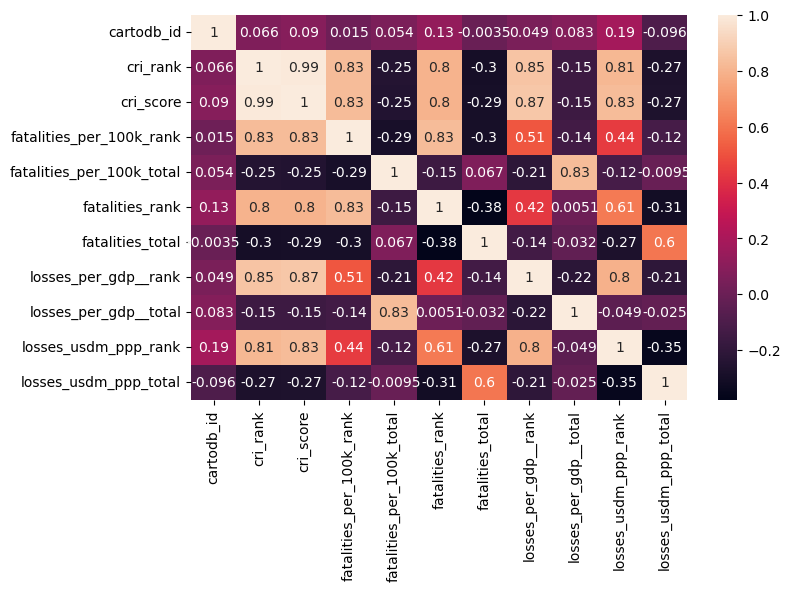

In [22]:
#heatmap for original dataframe
plt.figure(figsize=(8, 5))
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(df.corr(), annot = True)
plt.savefig('correlation.jpeg')

<AxesSubplot:>

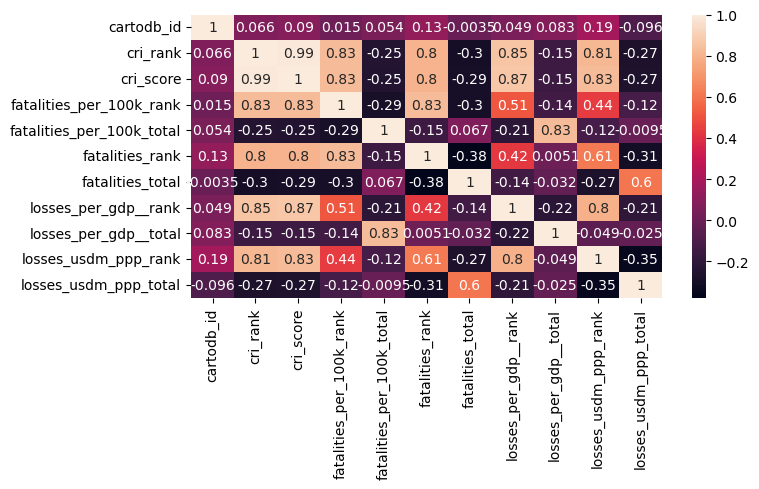

In [23]:
#heatmap for scaled dataframe correlation values
plt.figure(figsize=(8, 5))
sns.heatmap(df_new.corr(), annot = True)

#### from the heatmap taking out correlation values with positive relationships with the target variable

In [24]:
df[['cri_rank', 'cri_score', 'fatalities_per_100k_rank', 'losses_per_gdp__rank', 'losses_usdm_ppp_rank','fatalities_rank']].corr()

,cri_rank,cri_score,fatalities_per_100k_rank,losses_per_gdp__rank,losses_usdm_ppp_rank,fatalities_rank
cri_rank,1.000000,0.992048,0.833149,0.854871,0.814919,0.796102
cri_score,0.992048,1.000000,0.831365,0.866318,0.829412,0.799179
fatalities_per_100k_rank,0.833149,0.831365,1.000000,0.513147,0.439927,0.830423
losses_per_gdp__rank,0.854871,0.866318,0.513147,1.000000,0.795313,0.424587
losses_usdm_ppp_rank,0.814919,0.829412,0.439927,0.795313,1.000000,0.613882
fatalities_rank,0.796102,0.799179,0.830423,0.424587,0.613882,1.000000


<h3>Visualizing Relationships<h3>

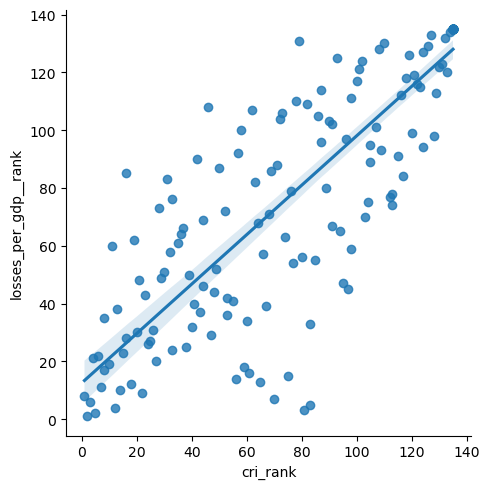

In [25]:
#checking relationship between possible predictor and target variable
sns.lmplot(x = 'cri_rank', y ='losses_per_gdp__rank', data = df)

<AxesSubplot:xlabel='fatalities_per_100k_rank', ylabel='losses_per_gdp__rank'>

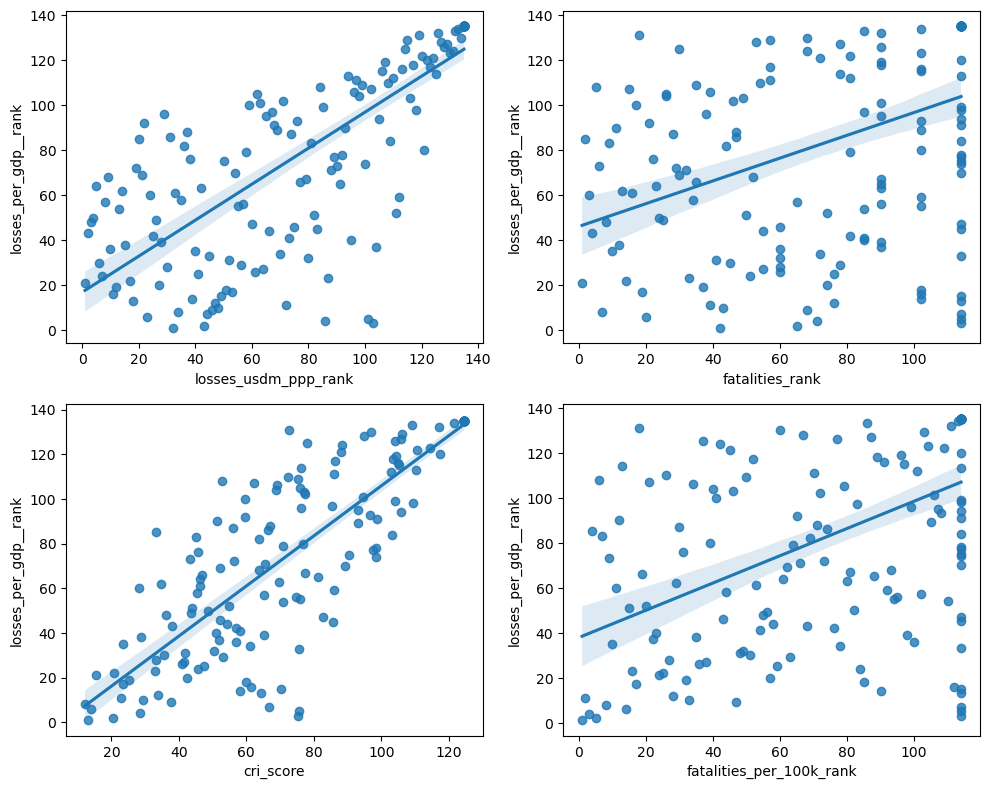

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))
sns.regplot(x = 'losses_usdm_ppp_rank', y = 'losses_per_gdp__rank', data = df, ax=ax[0,0])
sns.regplot(x = 'fatalities_rank', y = 'losses_per_gdp__rank', data = df, ax=ax[0,1])
sns.regplot(x = 'cri_score', y = 'losses_per_gdp__rank', data = df, ax=ax[1,0])
sns.regplot(x = 'fatalities_per_100k_rank', y = 'losses_per_gdp__rank', data = df, ax=ax[1,1])

From the above visualization, 'cri_rank','cri_score','losses_usdm_ppp_rank' are strong predictors of our target
variable 'losses_per_gdp__rank'.  
Whereas, 'fatalities_rank' and 'fatalities_per_100k_rank' are weak predictors and have several outliers that would affect the model's performance.

<AxesSubplot:xlabel='cri_rank', ylabel='fatalities_per_100k_rank'>

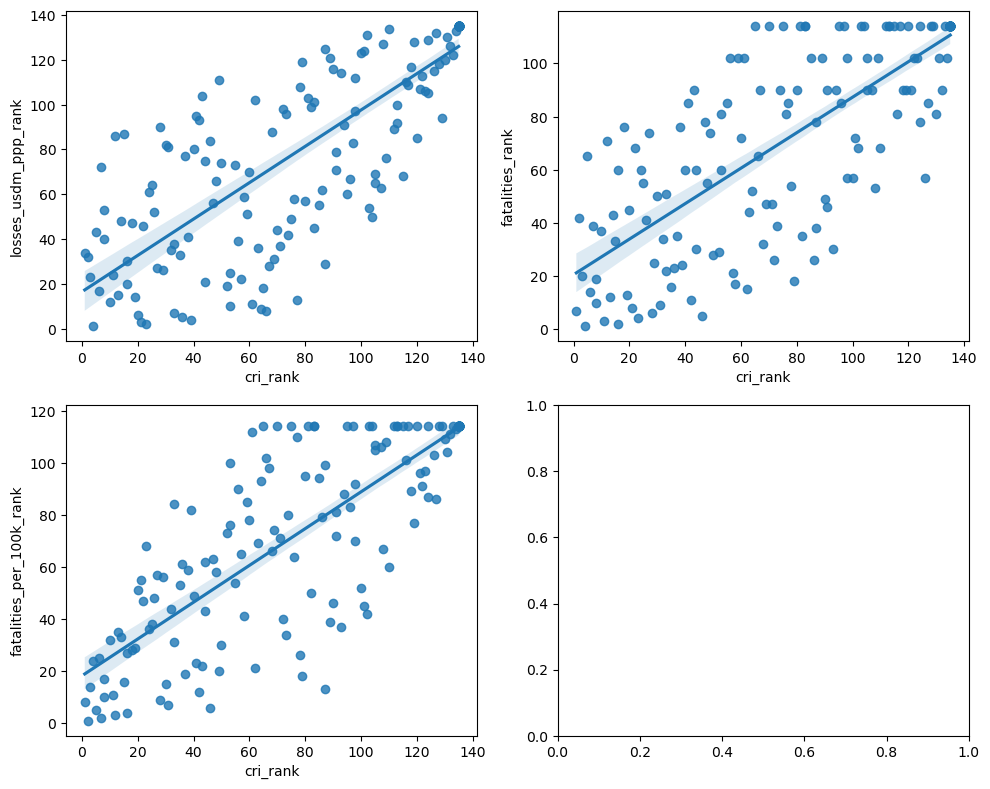

In [27]:
#visualizing relationships amongs feature variables
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))
sns.regplot(x = 'cri_rank', y = 'losses_usdm_ppp_rank', data = df, ax=ax[0,0])
sns.regplot(x = 'cri_rank', y = 'fatalities_rank', data = df, ax=ax[0,1])
sns.regplot(x = 'cri_rank', y = 'fatalities_per_100k_rank', data = df, ax=ax[1,0])

### Visualizing outliers

<AxesSubplot:>

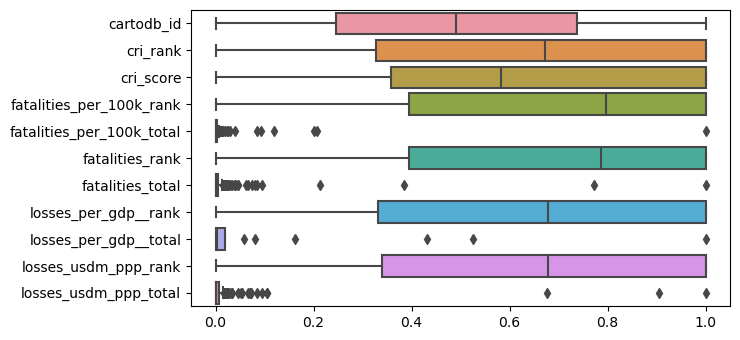

In [33]:
sns.boxplot(data=df_new, orient='h')

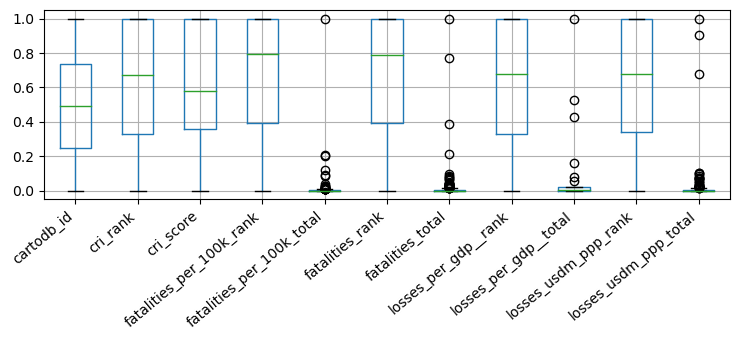

In [31]:
ax =df_new.boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

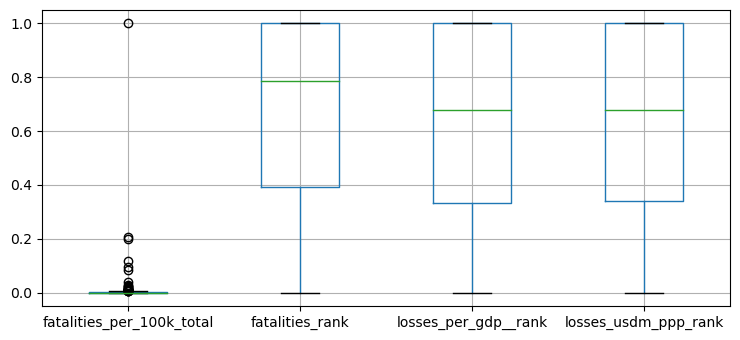

In [32]:
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax =df_new.boxplot(column = ['fatalities_per_100k_total', 'fatalities_rank','losses_per_gdp__rank','losses_usdm_ppp_rank'])
plt.tight_layout()

In [ ]:
#temp_df = pd.DataFrame(df_new['losses_per_gdp__total'], columns=['losses_per_gdp__total'])

In [35]:
df_new.drop(['fatalities_per_100k_total','losses_per_gdp__total','fatalities_total','losses_usdm_ppp_total'],
        axis = 1, inplace = True)

<AxesSubplot:>

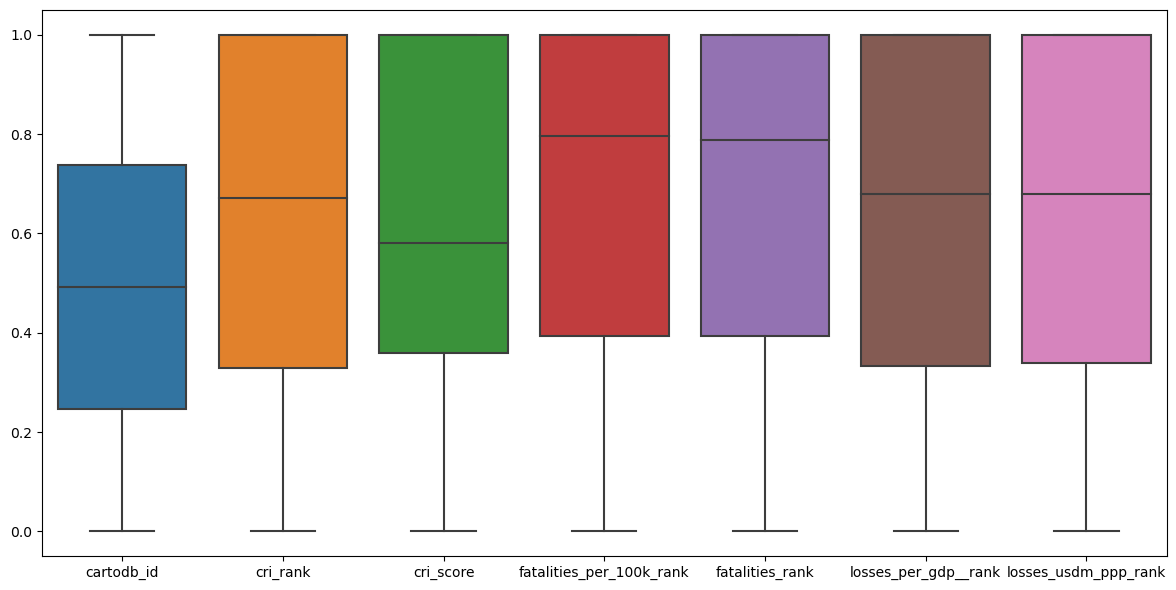

In [43]:
plt.figure(figsize =(12,6))
sns.boxplot(data=df_new)

<AxesSubplot:>

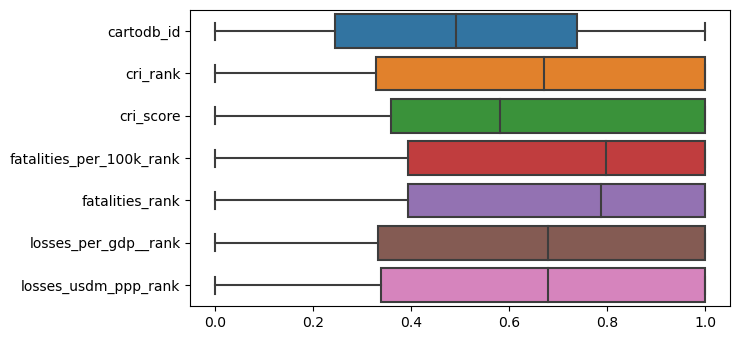

In [36]:
sns.boxplot(data=df_new, orient='h')

In [39]:
sns.barplot(data=df['country'], orient ='h')

ValueError: could not convert string to float: 'Saudi Arabia'

In [30]:
#dropping columns with outliers
df.drop(['fatalities_per_100k_total','losses_per_gdp__total','fatalities_per_100k_total','fatalities_total'], axis = 1, inplace = True)

In [31]:
df.drop('cartodb_id', axis = 1, inplace = True)

In [32]:
df.drop('losses_usdm_ppp_total', axis = 1, inplace = True)

In [33]:
df.head()

,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_rank,losses_per_gdp__rank,losses_usdm_ppp_rank,country_code,country
0,79,72.50,18,18,131,119,SAU,Saudi Arabia
1,61,61.50,112,102,16,11,ROU,Romania
2,69,66.33,74,47,86,31,ESP,Spain
3,135,124.50,114,114,135,135,SVN,Slovenia
4,133,117.33,114,114,120,122,SSD,South Sudan


<Figure size 800x500 with 0 Axes>

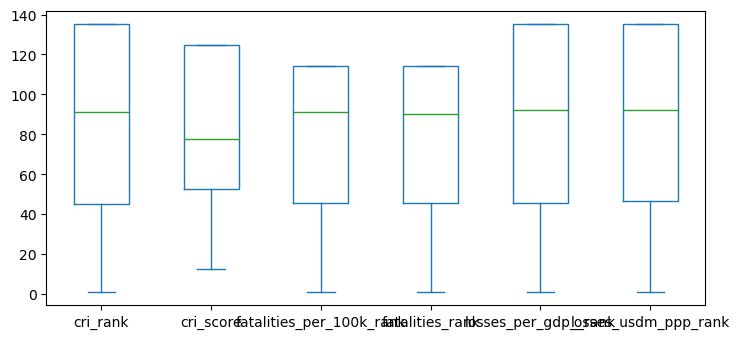

In [41]:
plt.figure(figsize=(8, 5))
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
ax = df.plot.box()
plt.savefig('boxplot.jpeg')

# Model training

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
X = df[['cri_rank','losses_usdm_ppp_rank']]
y =df['losses_per_gdp__rank']

In [37]:
model = LinearRegression()

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
model_predictions = model.predict(X_test)

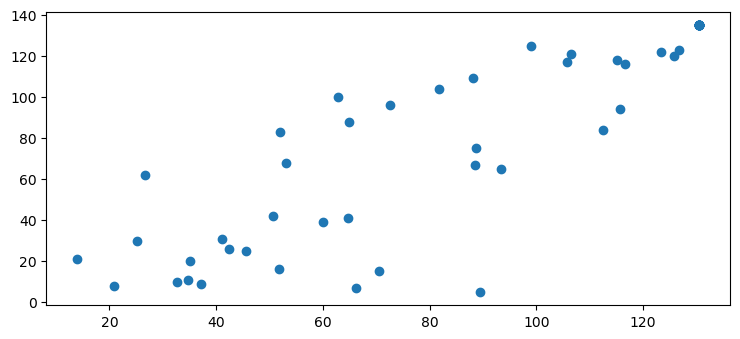

In [43]:
plt.scatter(x = model_predictions, y = y_test)

In [44]:
X_test.head()

,cri_rank,losses_usdm_ppp_rank
37,135,135
32,104,50
149,135,135
42,135,135
154,31,81


In [48]:
model.predict([[105,100]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([102.6350049])